In [17]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10,4]
mpl.rcParams['figure.dpi'] = 350
mpl.rcParams['savefig.dpi'] = 350

mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth']= 2.0

In [2]:
def global_mean_2D(var, weights):
    # assumes 2D field as var input

    # make sure masking is correct, otherwise we get nans
    var = np.ma.masked_invalid(var)
    
    # resulting variable should have dimensions of depth and time (x)
    ave = np.zeros(var.shape[0])

    # loop over time
    for t in np.arange(var.shape[0]):
        ave[t] = np.ma.average(var[t,:,:], weights = weights)
    return ave

# function to take global weighted mean, keeping depth information
def global_mean_3D(var, weights):
    # make sure masking is correct, otherwise we get nans
    var = np.ma.masked_invalid(var)
    
    # resulting variable should have dimensions of depth and time (x)
    ave = np.zeros([var.shape[0], var.shape[1]])

    # loop over time
    for t in np.arange(var.shape[0]):
    # loop over each depth slice
        for d in np.arange(var.shape[1]):
            ave[t,d] = np.ma.average(var[t,d,:,:], weights = weights)
    return ave

#make annual means from monthly timeseries, starting in June

#assumes data starts in january

def annual_mean_june(var,nyears):
    var_annual = np.zeros((nyears))
    for y in range(0,nyears):
        var_annual[y] = var[(y*12+6):(y*12+18)].mean()
        
    return var_annual


In [3]:
path = '/glade/u/home/chsharri/Work/NW/'

mask = xr.open_dataset('/glade/u/home/chsharri/Work/NW/region_mask_nw.nc')

temp_5 = xr.open_dataset(path+'nw_targets_01.pop.h.TEMP.nc')
temp_27 = xr.open_dataset(path+'nw_targets_02.pop.h.TEMP.nc')
temp_37 = xr.open_dataset(path+'nw_targets_03.pop.h.TEMP.nc')
temp_16 = xr.open_dataset(path+'nw_targets_04.pop.h.TEMP.nc')
temp_47 = xr.open_dataset(path+'nw_targets_05.pop.h.TEMP.nc')
temp_150 = xr.open_dataset(path+'nw_ur_150_07.pop.h.TEMP.nc')

#CONTROLS
temp_cntrl_1 = xr.open_dataset(path+'nw_cntrl_03.pop.h.TEMP.nc') # 25.5 years = 306
temp_cntrl_2 = xr.open_dataset(path+'nw_cntrl_03m02.pop.h.TEMP.nc') # 20 years = 240 mo
temp_cntrl_3 = xr.open_dataset(path+'nw_cntrl_03m03.pop.h.TEMP.nc') # 19 years = 228

In [53]:
dates_com = pd.date_range(start = '01/31/2018', end = '12/31/2034', freq='M')
dates_full = pd.date_range(start = '01/31/2018', end = '12/31/2049', freq='M')
dates_yr = pd.date_range(start = '12/31/2018', end = '12/31/2049', freq='Y')


In [5]:
sst_cntrl_1_global_mo = global_mean_2D(temp_cntrl_1.TEMP[(42-12):234,10,:,:], mask.TAREA)
sst_cntrl_2_global_mo = global_mean_2D(temp_cntrl_2.TEMP[(42-12):234,10,:,:], mask.TAREA)
sst_cntrl_3_global_mo = global_mean_2D(temp_cntrl_3.TEMP[(42-12):234,10,:,:], mask.TAREA)
full_control = (sst_cntrl_1_global_mo + sst_cntrl_2_global_mo + sst_cntrl_2_global_mo)/3


In [6]:
t_5_global_mo = global_mean_2D(temp_5.TEMP[:,10,:,:], mask.TAREA)
t_27_global_mo = global_mean_2D(temp_27.TEMP[:,10,:,:], mask.TAREA)
t_37_global_mo = global_mean_2D(temp_37.TEMP[:,10,:,:], mask.TAREA)
t_16_global_mo = global_mean_2D(temp_16.TEMP[:,10,:,:], mask.TAREA)
t_47_global_mo = global_mean_2D(temp_47.TEMP[:,10,:,:], mask.TAREA)
t_150_global_mo = global_mean_2D(temp_150.TEMP[:,10,:,:], mask.TAREA)

In [7]:
t_control_pre = full_control[0:24]

In [8]:
t_5_global  = np.append(t_control_pre, t_5_global_mo)
t_27_global = np.append(t_control_pre, t_27_global_mo)
t_37_global = np.append(t_control_pre, t_37_global_mo)
t_16_global = np.append(t_control_pre, t_16_global_mo)
t_47_global = np.append(t_control_pre, t_47_global_mo)
t_150_global= np.append(t_control_pre, t_150_global_mo)

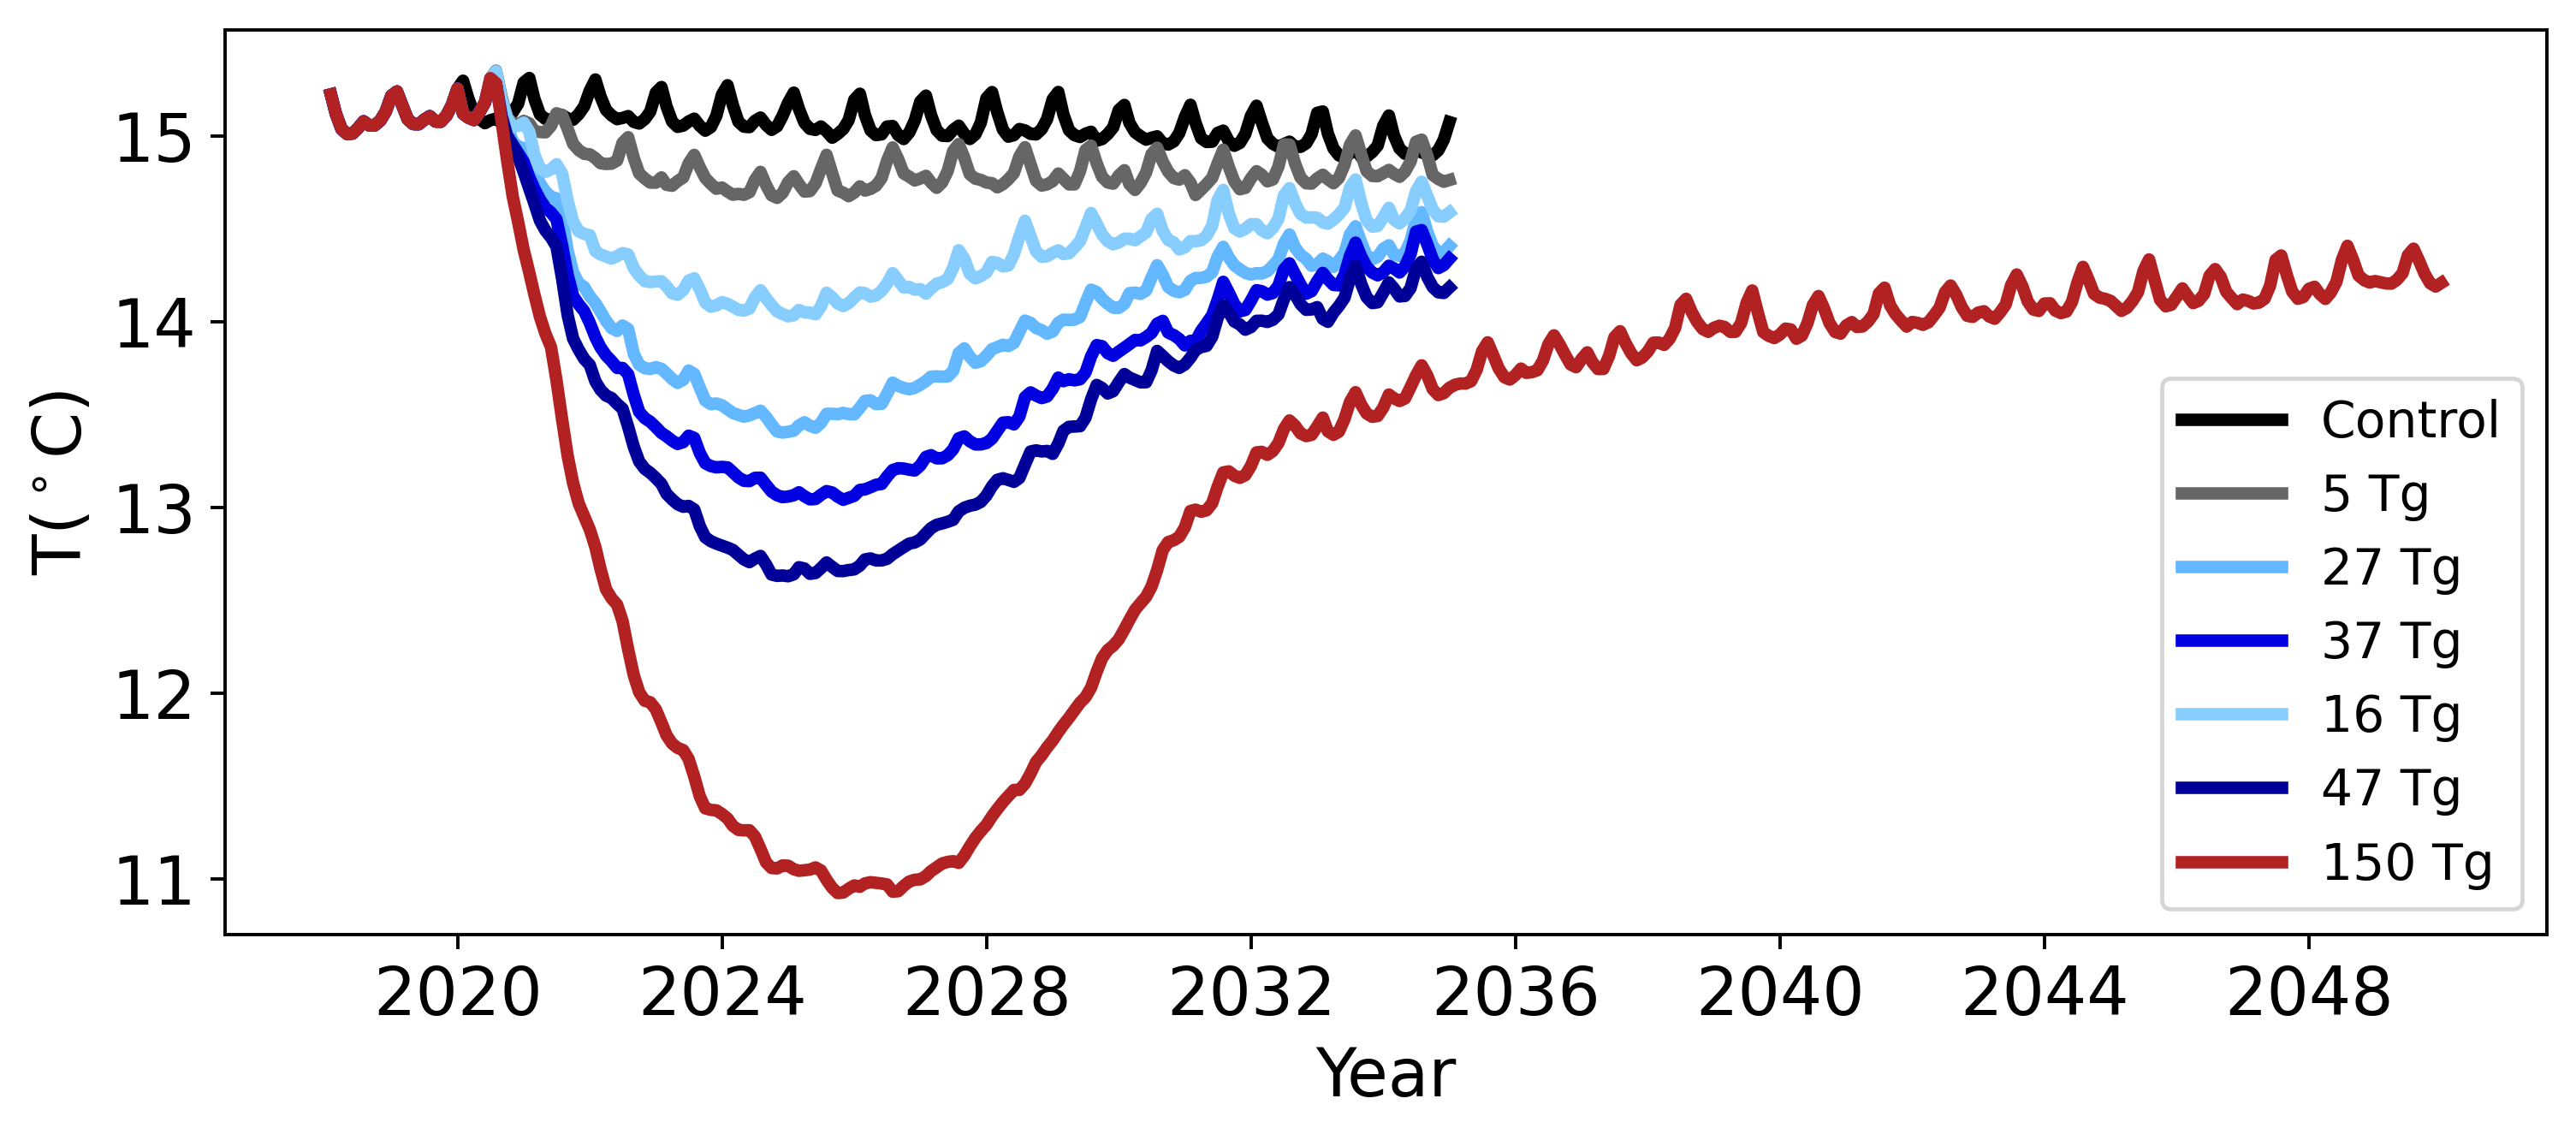

In [11]:
fig= plt.figure(figsize=(10,4), facecolor='w')

plt.plot(dates_com,1*(full_control),color = 'k', linewidth = 3, label = 'Control')
plt.plot(dates_com,1*t_5_global,color = '#666666', linewidth = 3, label = '5 Tg')
plt.plot(dates_com,1*t_27_global,color = '#63b8ff', linewidth = 3, label = '27 Tg')
plt.plot(dates_com,1*t_37_global,color = '#0000e1', linewidth = 3, label = '37 Tg')
plt.plot(dates_com,1*t_16_global,color = '#87ceff', linewidth = 3, label = '16 Tg')
plt.plot(dates_com,1*t_47_global,color = '#000099', linewidth = 3, label = '47 Tg')
plt.plot(dates_full,1*t_150_global,color = '#b22222', linewidth = 3, label = '150 Tg')

plt.legend( loc='lower right',fontsize = '12')

plt.xlabel('Year')
plt.ylabel('T($^\circ$C)')

plt.show() 
saveState = '/glade/u/home/vgarza/par/'
ptitle = 'SST with color'
#fig.savefig(saveState+ ptitle+ ' '  , bbox_inches='tight', quality = 95, dpi = 500)

In [12]:
t_5_global_yr = annual_mean_june(t_5_global_mo, 15)
t_27_global_yr = annual_mean_june(t_27_global_mo, 15)
t_37_global_yr = annual_mean_june(t_37_global_mo, 15)
t_16_global_yr = annual_mean_june(t_16_global_mo, 15)
t_47_global_yr = annual_mean_june(t_47_global_mo, 15)
#sst_150_global_yr = annual_mean_june(sst_150_global_mo, 15) #truncated version
t_150_global_yr = annual_mean_june(t_150_global_mo, 30) #full version
                                    
control_pre_annual = annual_mean_june(t_control_pre,2)
full_control_annual= annual_mean_june(full_control,17) 

In [13]:
t_5_global_yr = np.append(control_pre_annual,  t_5_global_yr)
t_27_global_yr = np.append(control_pre_annual, t_27_global_yr)
t_37_global_yr = np.append(control_pre_annual, t_37_global_yr)
t_16_global_yr = np.append(control_pre_annual, t_16_global_yr)
t_47_global_yr = np.append(control_pre_annual, t_47_global_yr)
t_150_global_yr = np.append(control_pre_annual,t_150_global_yr)

In [14]:
T_100Mean = 0
T_100Mean = np.append(T_100Mean,t_5_global_yr.mean())
T_100Mean = np.append(T_100Mean,t_16_global_yr.mean())
T_100Mean = np.append(T_100Mean,t_27_global_yr.mean())
T_100Mean = np.append(T_100Mean,t_37_global_yr.mean())
T_100Mean = np.append(T_100Mean,t_47_global_yr.mean())
T_100Mean = np.append(T_100Mean,t_150_global_yr.mean())

In [42]:
T_100Mean = 0
T_100Mean = np.append(T_100Mean,t_5_global_yr.mean()-full_control_annual.mean())
T_100Mean = np.append(T_100Mean,t_16_global_yr.mean()-full_control_annual.mean())
T_100Mean = np.append(T_100Mean,t_27_global_yr.mean()-full_control_annual.mean())
T_100Mean = np.append(T_100Mean,t_37_global_yr.mean()-full_control_annual.mean())
T_100Mean = np.append(T_100Mean,t_47_global_yr.mean()-full_control_annual.mean())
T_100Mean = np.append(T_100Mean,
t_150_global_yr.mean()-full_control_annual.mean())

In [43]:
swanom =np.array([0,-10.9,-31.1,-46.9,-57.8,-68.7,-115.3])

In [46]:
slope3, intercept3, r_value3, p_value3, std_err3= stats.linregress(-1*swanom,T_100Mean,)

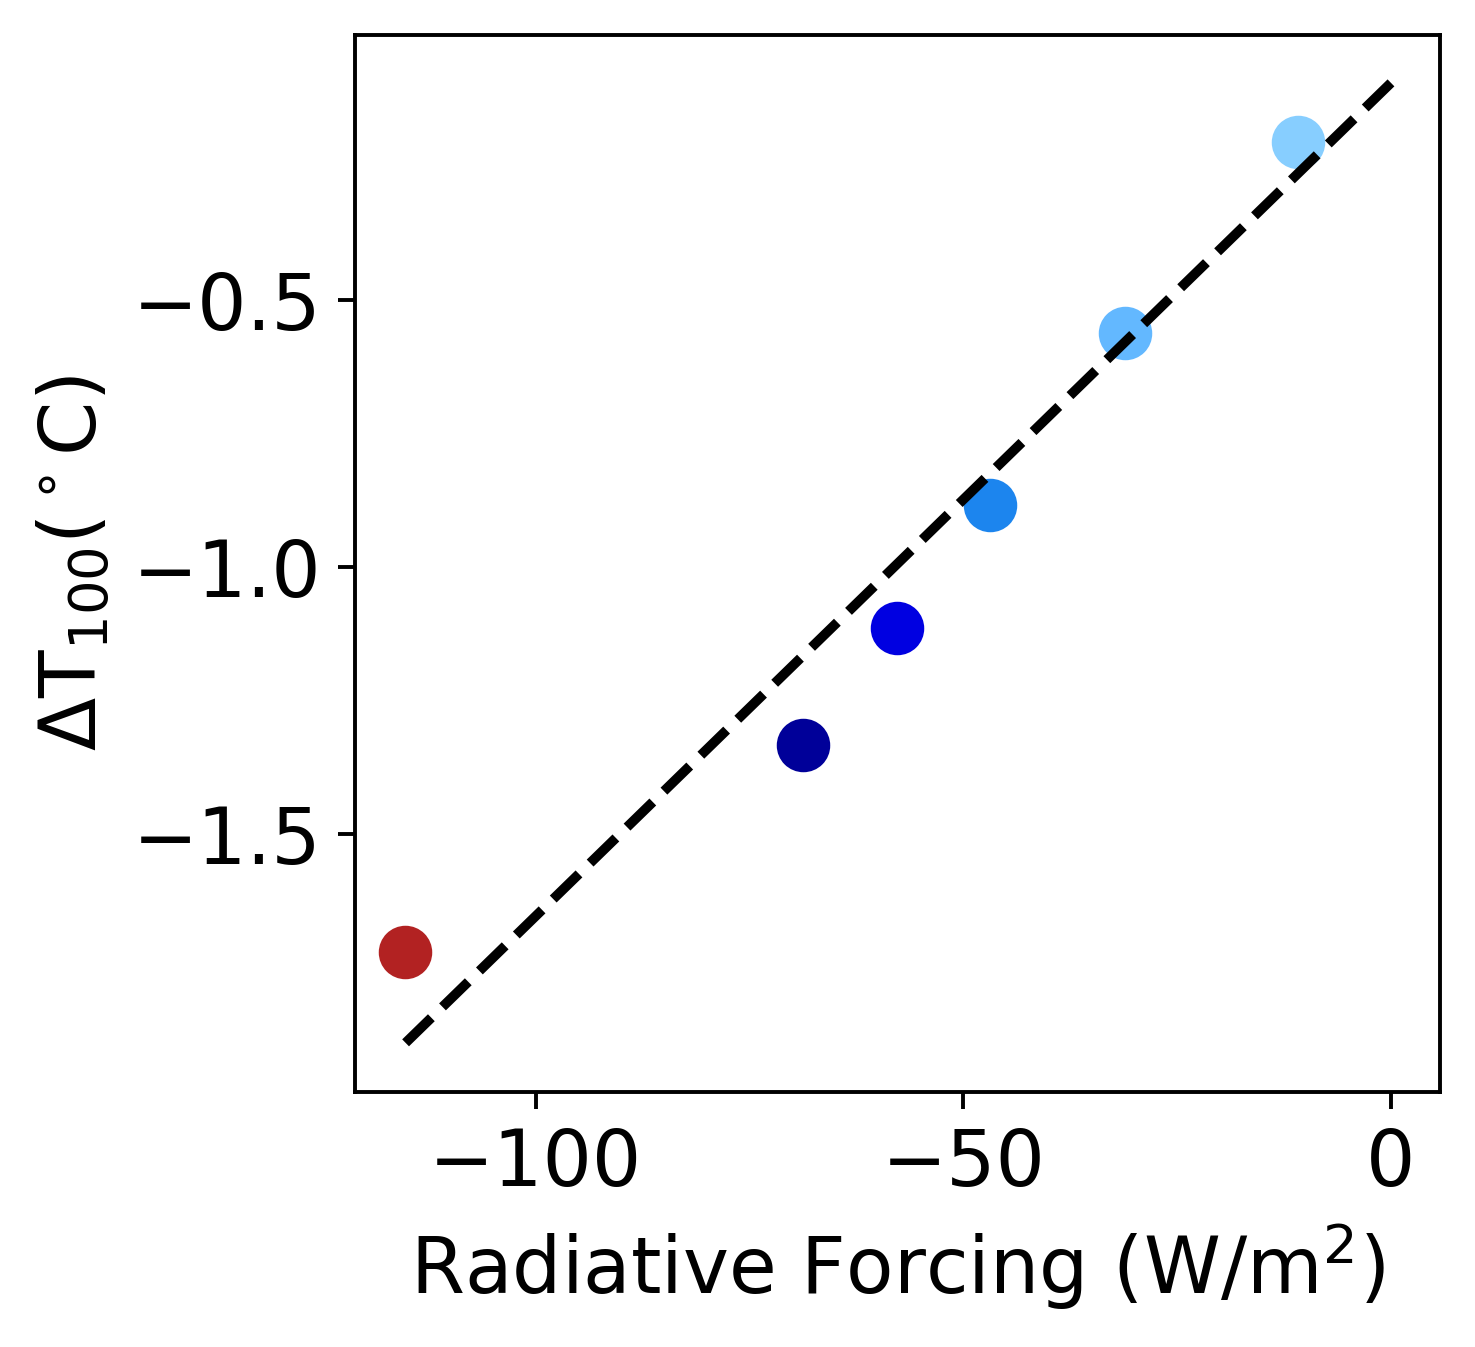

In [47]:
fig,ax1 = plt.subplots(figsize=(4,4), facecolor='w')


#fig, ax1 = plt.subplots()
levels = np.array([0, -5, -16, -27, -37, -47, -150 ])

#plt.plot(levels,sst_2034,'k.', markersize = 10)
#plt.legend( loc='lower right',fontsize = '10')
#plt.plot(dates_yr,1*sst_150_global_yr,color = '#b22222', linewidth = 1, label = '150 Tg')
#plt.plot(0,t_control_2034,color = 'k',marker='.', label = 'Control')
ax1.plot(-10.9,t_5_global_yr.mean()-full_control_annual.mean(),color = '#87ceff', marker='.', label = '5 Tg',markersize = '20')
ax1.plot(-31.1,t_16_global_yr.mean()-full_control_annual.mean(), color = '#63b8ff', marker='.', label = '16 Tg',markersize = '20')
ax1.plot(-46.9,t_27_global_yr.mean()-full_control_annual.mean(), color = '#1c85ee', marker='.', label = '27 Tg',markersize = '20')
ax1.plot(-57.8,t_37_global_yr.mean()-full_control_annual.mean(), color = '#0000e1', marker='.', label = '37 Tg',markersize = '20')
ax1.plot(-68.7,t_47_global_yr.mean()-full_control_annual.mean(), color = '#000099', marker='.', label = '47 Tg',markersize = '20')
ax1.plot(-115.3,t_150_global_yr.mean()-full_control_annual.mean(),color = '#b22222', marker='.', label = '150 Tg',markersize = '20')

ax1.plot(1*swanom, slope3*(-1*swanom)+intercept3,'k--')

ax1.set_xlabel('Radiative Forcing (W/m$^2$)')#+'Forcing (-W/m$^2$)')
ax1.set_ylabel('$\Delta$T$_{100}$($^\circ$C)')

#ax1.legend( loc='lower left',fontsize = '10', scatterpoints=1)
plt.show() 

saveState = '/glade/u/home/vgarza/par/'
ptitle = 'Delta T_100 mean with forcing, not truncated'

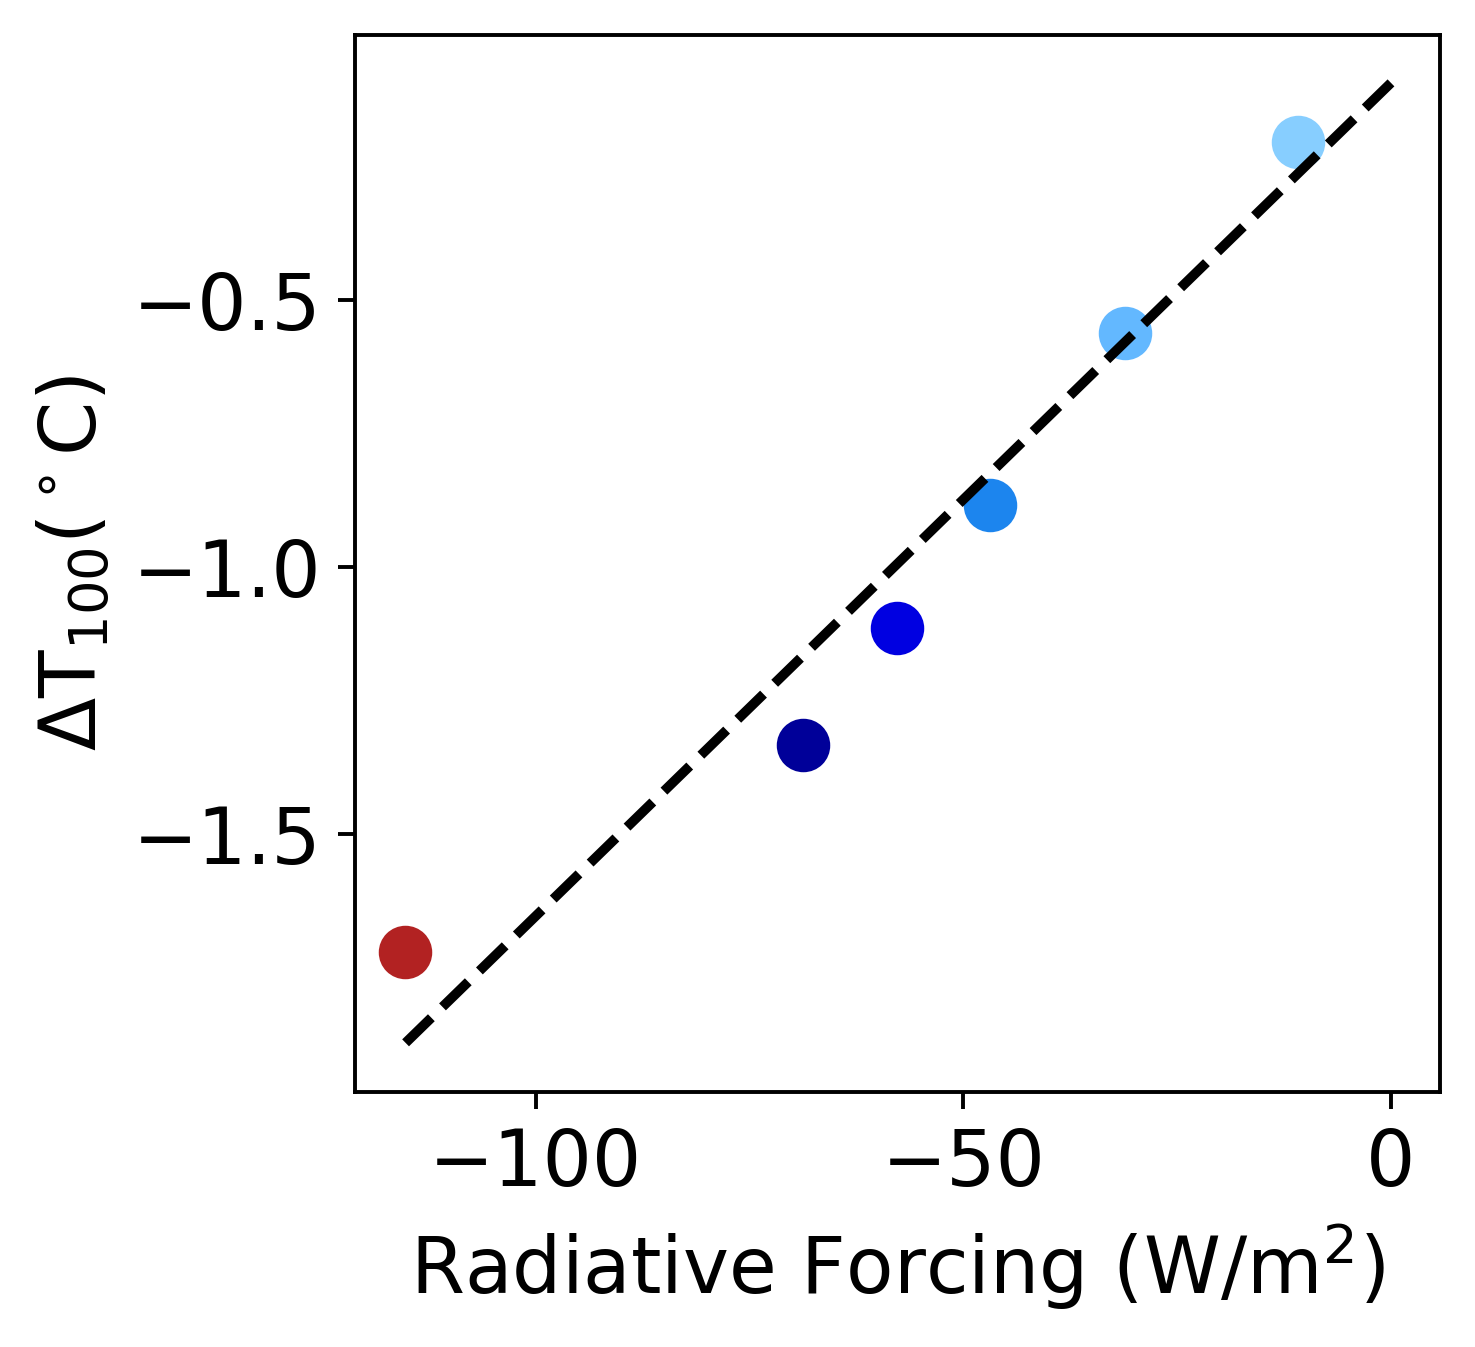

In [48]:
fig,ax1 = plt.subplots(figsize=(4,4), facecolor='w')


#fig, ax1 = plt.subplots()
levels = np.array([0, 5, 16, 27, 37, 47, 150 ])

#plt.plot(levels,sst_2034,'k.', markersize = 10)
#plt.legend( loc='lower right',fontsize = '10')
#plt.plot(dates_yr,1*sst_150_global_yr,color = '#b22222', linewidth = 1, label = '150 Tg')
#plt.plot(0,sst_control_2034,color = 'k',marker='.', label = 'Control')
ax1.plot(-10.9,t_5_global_yr.mean()-full_control_annual.mean(),color = '#87ceff', marker='.', label = '5 Tg',markersize = '20')
ax1.plot(-31.1,t_16_global_yr.mean()-full_control_annual.mean(), color = '#63b8ff', marker='.', label = '16 Tg',markersize = '20')
ax1.plot(-46.9,t_27_global_yr.mean()-full_control_annual.mean(), color = '#1c85ee', marker='.', label = '27 Tg',markersize = '20')
ax1.plot(-57.8,t_37_global_yr.mean()-full_control_annual.mean(), color = '#0000e1', marker='.', label = '37 Tg',markersize = '20')
ax1.plot(-68.7,t_47_global_yr.mean()-full_control_annual.mean(), color = '#000099', marker='.', label = '47 Tg',markersize = '20')
ax1.plot(-115.3,t_150_global_yr.mean()-full_control_annual.mean(),color = '#b22222', marker='.', label = '150 Tg',markersize = '20')

ax1.plot(1*swanom, slope3*(-1*swanom)+intercept3,'k--')

ax1.set_xlabel('Radiative Forcing (W/m$^2$)')#+'Forcing (-W/m$^2$)')
ax1.set_ylabel('$\Delta$T$_{100}$($^\circ$C)')

#ax1.legend( loc='lower left',fontsize = '10', scatterpoints=1)
plt.show() 

saveState = '/glade/u/home/vgarza/par/'
ptitle = 'Delta T_100 mean with forcing, not truncated'

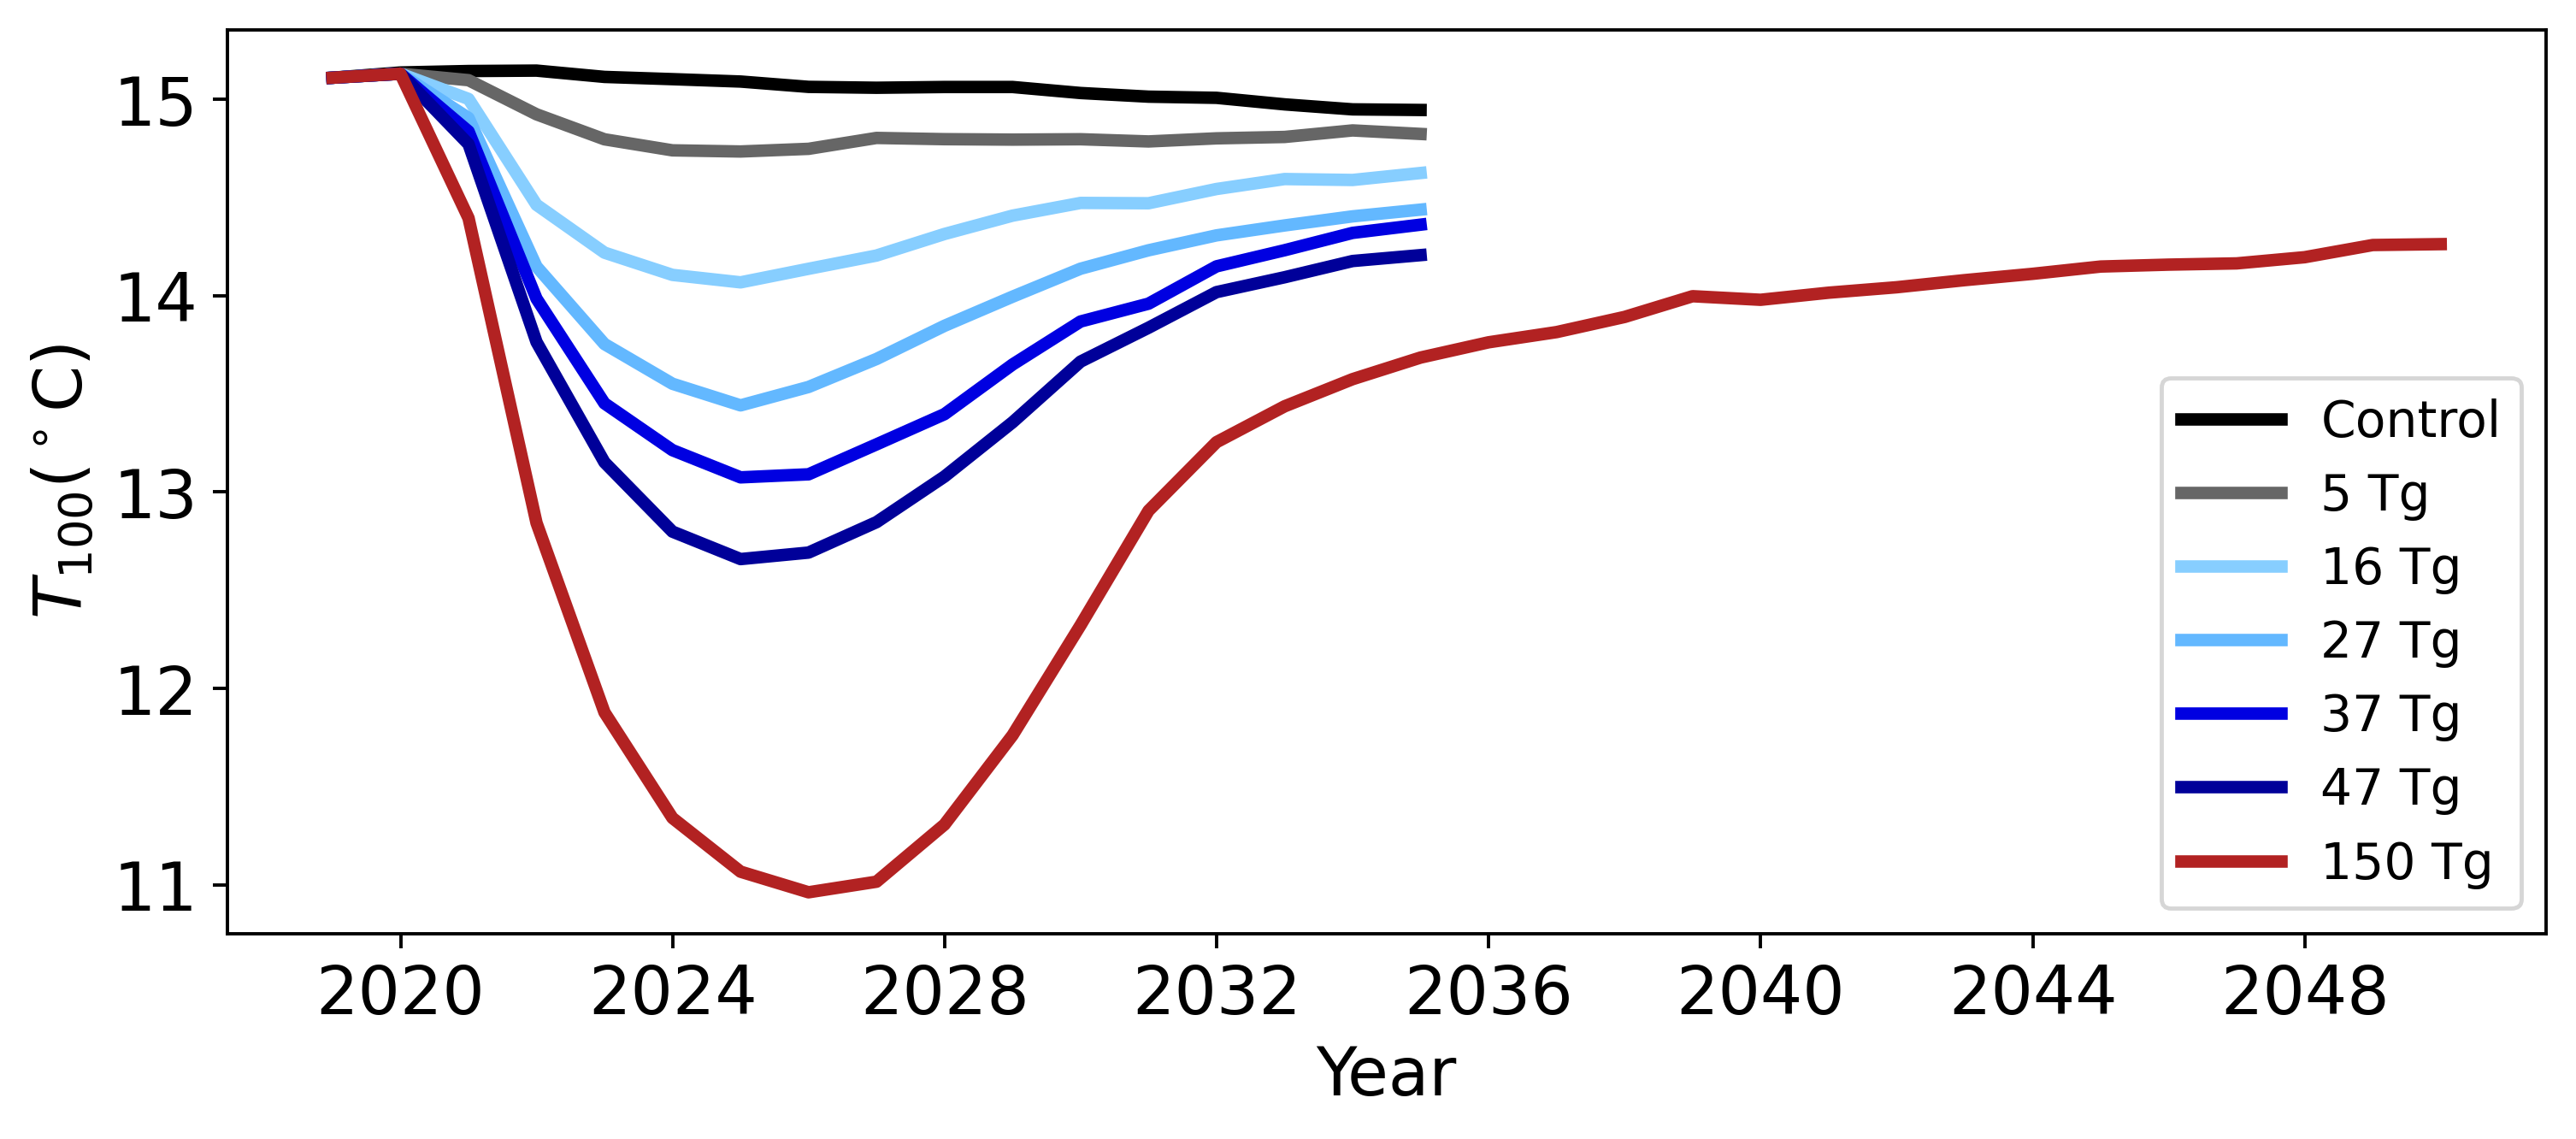

In [56]:
fig,ax= plt.subplots(figsize=(10,4), facecolor='w')

plt.plot(dates_yr[0:17],1*(full_control_annual),color = 'k', linewidth = 3, label = 'Control')
plt.plot(dates_yr[0:17],1*t_5_global_yr,color = '#666666', linewidth = 3, label = '5 Tg')
plt.plot(dates_yr[0:17],1*t_16_global_yr,color = '#87ceff', linewidth = 3, label = '16 Tg')
plt.plot(dates_yr[0:17],1*t_27_global_yr,color = '#63b8ff', linewidth = 3, label = '27 Tg')
plt.plot(dates_yr[0:17],1*t_37_global_yr,color = '#0000e1', linewidth = 3, label = '37 Tg')
plt.plot(dates_yr[0:17],1*t_47_global_yr,color = '#000099', linewidth = 3, label = '47 Tg')
plt.plot(dates_yr,1*t_150_global_yr,color = '#b22222', linewidth = 3, label = '150 Tg')

plt.legend( loc='lower right',fontsize = '12')

#ax.set_ylim([0,-7])

plt.xlabel('Year')
plt.ylabel('$T_{100}$($^\circ$C)')

plt.show() 

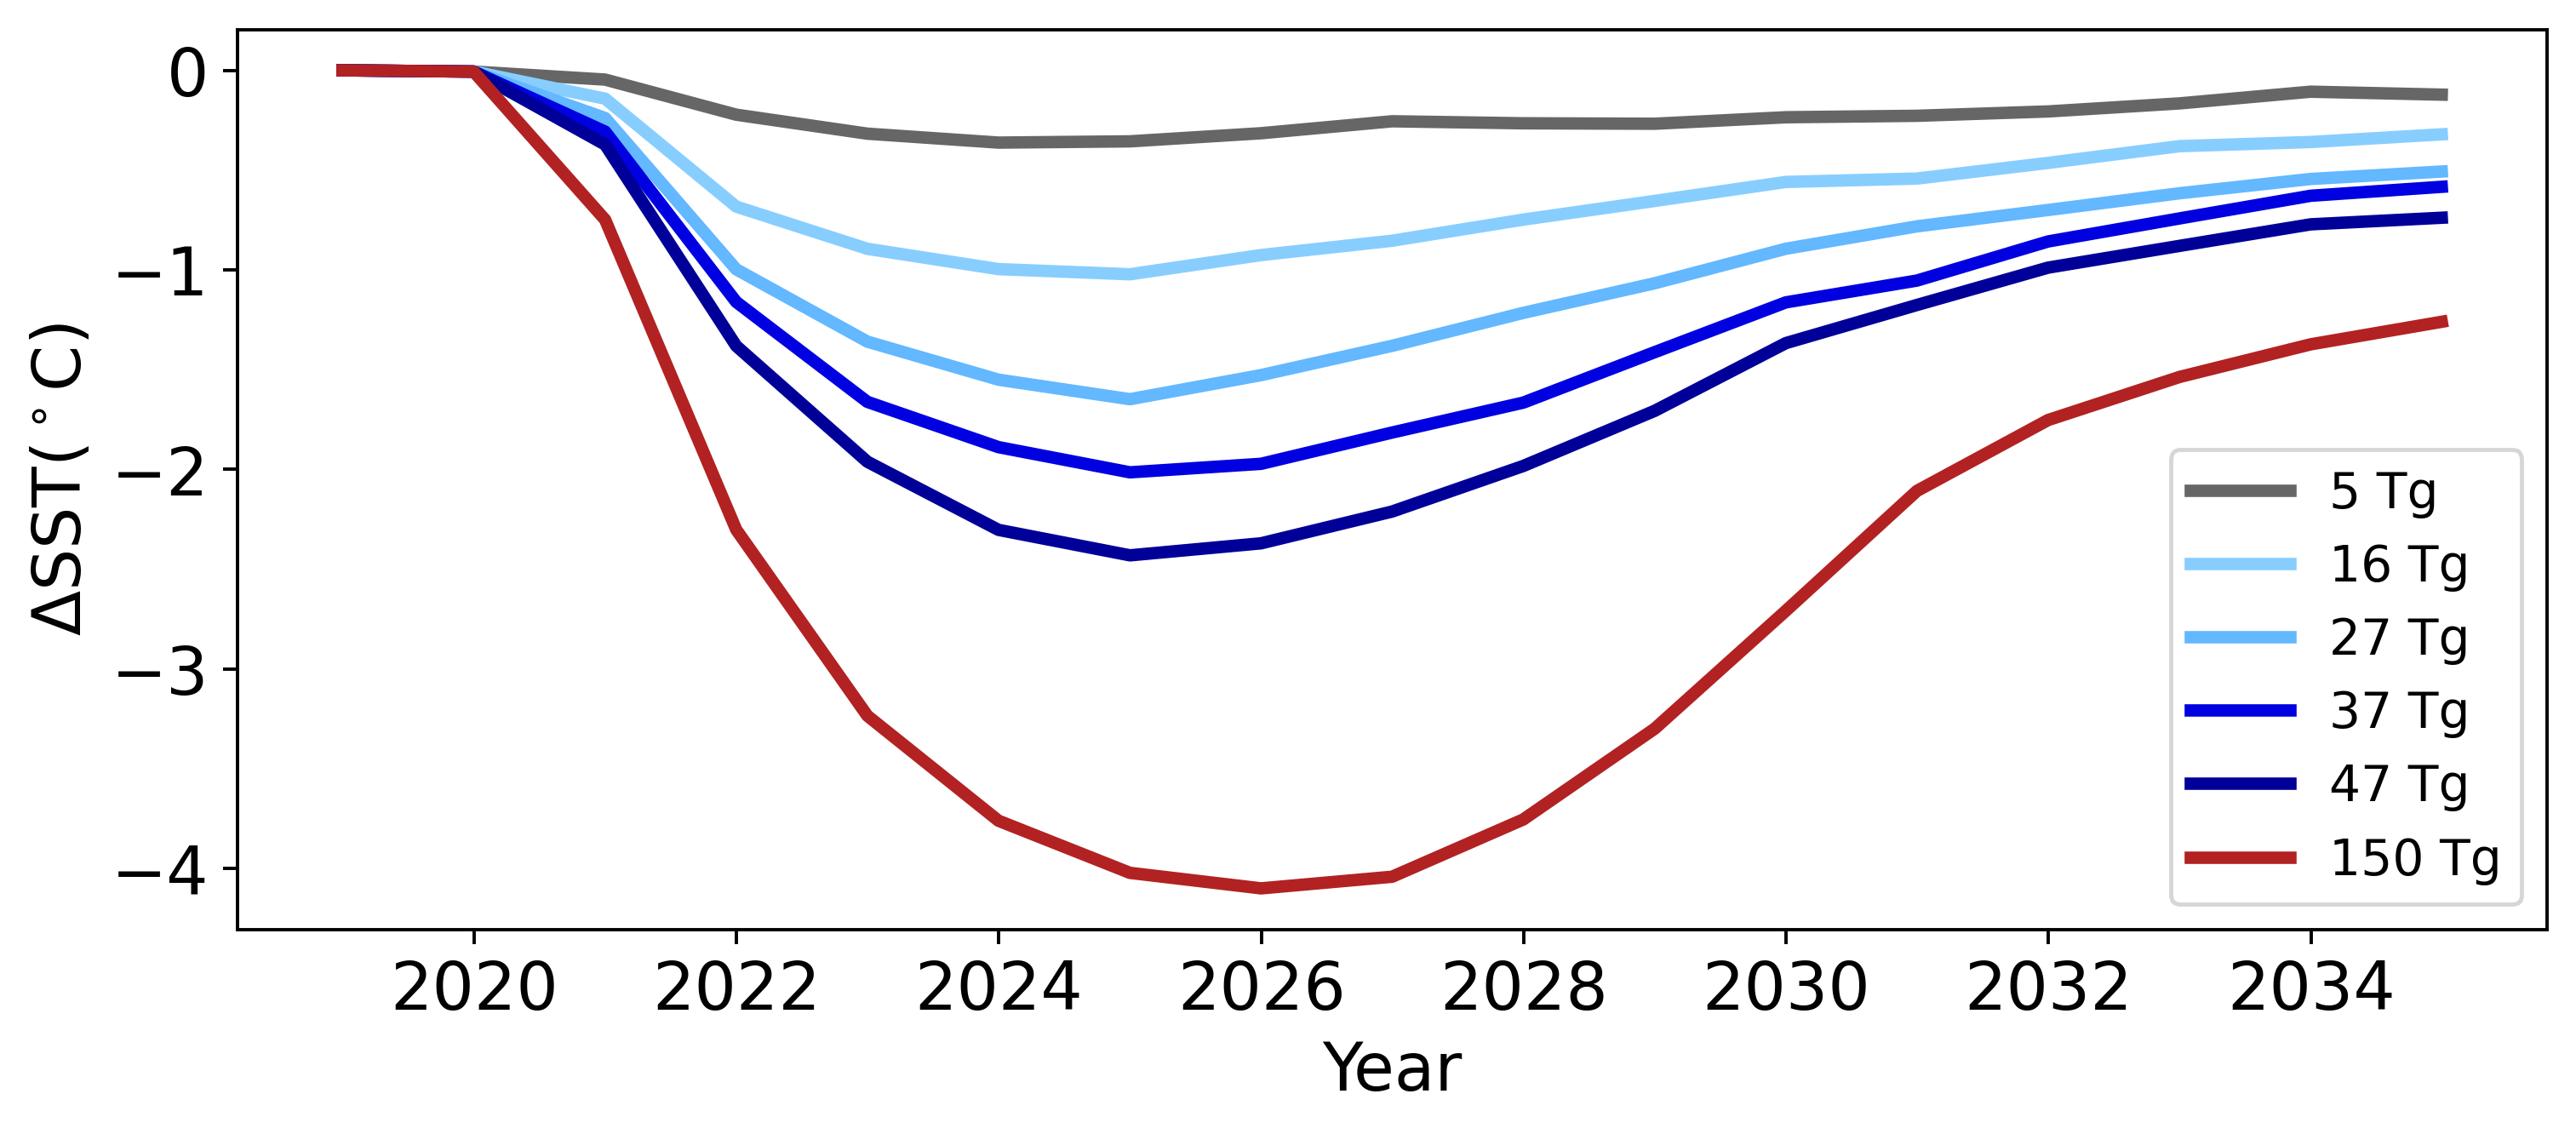

In [61]:
fig= plt.figure(figsize=(10,4), facecolor='w')

#plt.plot(dates_yr,1*(full_control_annual),color = 'k', linewidth = 1, label = 'Control')
plt.plot(dates_yr[0:17],1*t_5_global_yr-full_control_annual,color = '#666666', linewidth = 3, label = '5 Tg')
plt.plot(dates_yr[0:17],1*t_16_global_yr-full_control_annual,color = '#87ceff', linewidth = 3, label = '16 Tg')
plt.plot(dates_yr[0:17],1*t_27_global_yr-full_control_annual,color = '#63b8ff', linewidth = 3, label = '27 Tg')
plt.plot(dates_yr[0:17],1*t_37_global_yr-full_control_annual,color = '#0000e1', linewidth = 3, label = '37 Tg')
plt.plot(dates_yr[0:17],1*t_47_global_yr-full_control_annual,color = '#000099', linewidth = 3, label = '47 Tg')
plt.plot(dates_yr[0:17],1*t_150_global_yr[0:17]-full_control_annual,color = '#b22222', linewidth = 3, label = '150 Tg')

plt.legend( loc='lower right',fontsize = '12')



plt.xlabel('Year')
plt.ylabel('$\Delta$SST($^\circ$C)')

plt.show() 
saveState = '/glade/u/home/vgarza/par/'
ptitle = 'Annual SST Anomaly'
#fig.savefig(saveState+ ptitle+ ' '  , bbox_inches='tight', quality = 95, dpi = 500)

In [71]:
sst_5_2034 = t_5_global_yr[16:17]
sst_27_2034 = t_27_global_yr[16:17]
sst_37_2034 = t_37_global_yr[16:17]
sst_16_2034 = t_16_global_yr[16:17]
sst_47_2034 = t_47_global_yr[16:17]
sst_150_2034 =t_150_global_yr[16:17]

sst_control_2034 = full_control_annual[16:17]

In [72]:
sst_2034 = 0
sst_2034 = np.append(sst_2034,sst_5_2034-sst_control_2034)
sst_2034 = np.append(sst_2034,sst_16_2034-sst_control_2034)
sst_2034 = np.append(sst_2034,sst_27_2034-sst_control_2034)
sst_2034 = np.append(sst_2034,sst_37_2034-sst_control_2034)
sst_2034 = np.append(sst_2034,sst_47_2034-sst_control_2034)
sst_2034 = np.append(sst_2034,sst_150_2034-sst_control_2034)

In [62]:
nit_5 = xr.open_dataset(path+'nw_targets_01.pop.h.NO3.nc')
nit_27 = xr.open_dataset(path+'nw_targets_02.pop.h.NO3.nc')
nit_37 = xr.open_dataset(path+'nw_targets_03.pop.h.NO3.nc')
nit_16 = xr.open_dataset(path+'nw_targets_04.pop.h.NO3.nc')
nit_47 = xr.open_dataset(path+'nw_targets_05.pop.h.NO3.nc')
nit_150 = xr.open_dataset(path+'nw_ur_150_07.pop.h.NO3.nc')

#CONTROLS
nit_cntrl_1 = xr.open_dataset(path+'nw_cntrl_03.pop.h.NO3.nc') # 25.5 years = 306


In [64]:
nit_cntrl_1_global_mo = global_mean_2D(nit_cntrl_1.NO3[(42-12):234,10,:,:], mask.TAREA)

In [65]:
nit_5_global_mo = global_mean_2D(nit_5.NO3[:,10,:,:], mask.TAREA)
nit_27_global_mo = global_mean_2D(nit_27.NO3[:,10,:,:], mask.TAREA)
nit_37_global_mo = global_mean_2D(nit_37.NO3[:,10,:,:], mask.TAREA)
nit_16_global_mo = global_mean_2D(nit_16.NO3[:,10,:,:], mask.TAREA)
nit_47_global_mo = global_mean_2D(nit_47.NO3[:,10,:,:], mask.TAREA)
nit_150_global_mo = global_mean_2D(nit_150.NO3[:,10,:,:], mask.TAREA)

In [66]:
n_control_pre = nit_cntrl_1_global_mo[0:24]

In [67]:
nit_5_global  = np.append(n_control_pre, nit_5_global_mo)
nit_27_global = np.append(n_control_pre, nit_27_global_mo)
nit_37_global = np.append(n_control_pre, nit_37_global_mo)
nit_16_global = np.append(n_control_pre, nit_16_global_mo)
nit_47_global = np.append(n_control_pre, nit_47_global_mo)
nit_150_global= np.append(n_control_pre, nit_150_global_mo)

In [68]:
nit_5_global_yr = annual_mean_june(nit_5_global_mo, 15)
nit_27_global_yr = annual_mean_june(nit_27_global_mo, 15)
nit_37_global_yr = annual_mean_june(nit_37_global_mo, 15)
nit_16_global_yr = annual_mean_june(nit_16_global_mo, 15)
nit_47_global_yr = annual_mean_june(nit_47_global_mo, 15)

#nit_150_global_yr = annual_mean_june(nit_150_global_mo, 15)
nit_150_global_yr = annual_mean_june(nit_150_global_mo, 30)                                    
n_control_pre_annual = annual_mean_june(n_control_pre,2)
n_full_control_annual= annual_mean_june(nit_cntrl_1_global_mo,17)     

In [69]:
nit_5_global_yr = np.append(n_control_pre_annual,  nit_5_global_yr)
nit_27_global_yr = np.append(n_control_pre_annual, nit_27_global_yr)
nit_37_global_yr = np.append(n_control_pre_annual, nit_37_global_yr)
nit_16_global_yr = np.append(n_control_pre_annual, nit_16_global_yr)
nit_47_global_yr = np.append(n_control_pre_annual, nit_47_global_yr)
nit_150_global_yr = np.append(n_control_pre_annual,nit_150_global_yr)

In [70]:
nit_5_2034 = nit_5_global_yr[16:17]
nit_27_2034 = nit_27_global_yr[16:17]
nit_37_2034 = nit_37_global_yr[16:17]
nit_16_2034 = nit_16_global_yr[16:17]
nit_47_2034 = nit_47_global_yr[16:17]
nit_150_2034 = nit_150_global_yr[16:17]

nit_control_2034 = n_full_control_annual[16:17]

In [73]:
nit_2034 = 0
nit_2034 = np.append(nit_2034,nit_5_2034-nit_control_2034)
nit_2034 = np.append(nit_2034,nit_16_2034-nit_control_2034)
nit_2034 = np.append(nit_2034,nit_27_2034-nit_control_2034)
nit_2034 = np.append(nit_2034,nit_37_2034-nit_control_2034)
nit_2034 = np.append(nit_2034,nit_47_2034-nit_control_2034)
nit_2034 = np.append(nit_2034,nit_150_2034-nit_control_2034)

In [74]:
swanom =np.array([0, -10.9,-31.1,-46.9,-57.8,-68.7,-115.3])
slope3, intercept3, r_value3, p_value3, std_err3= stats.linregress(-1*swanom,sst_2034)

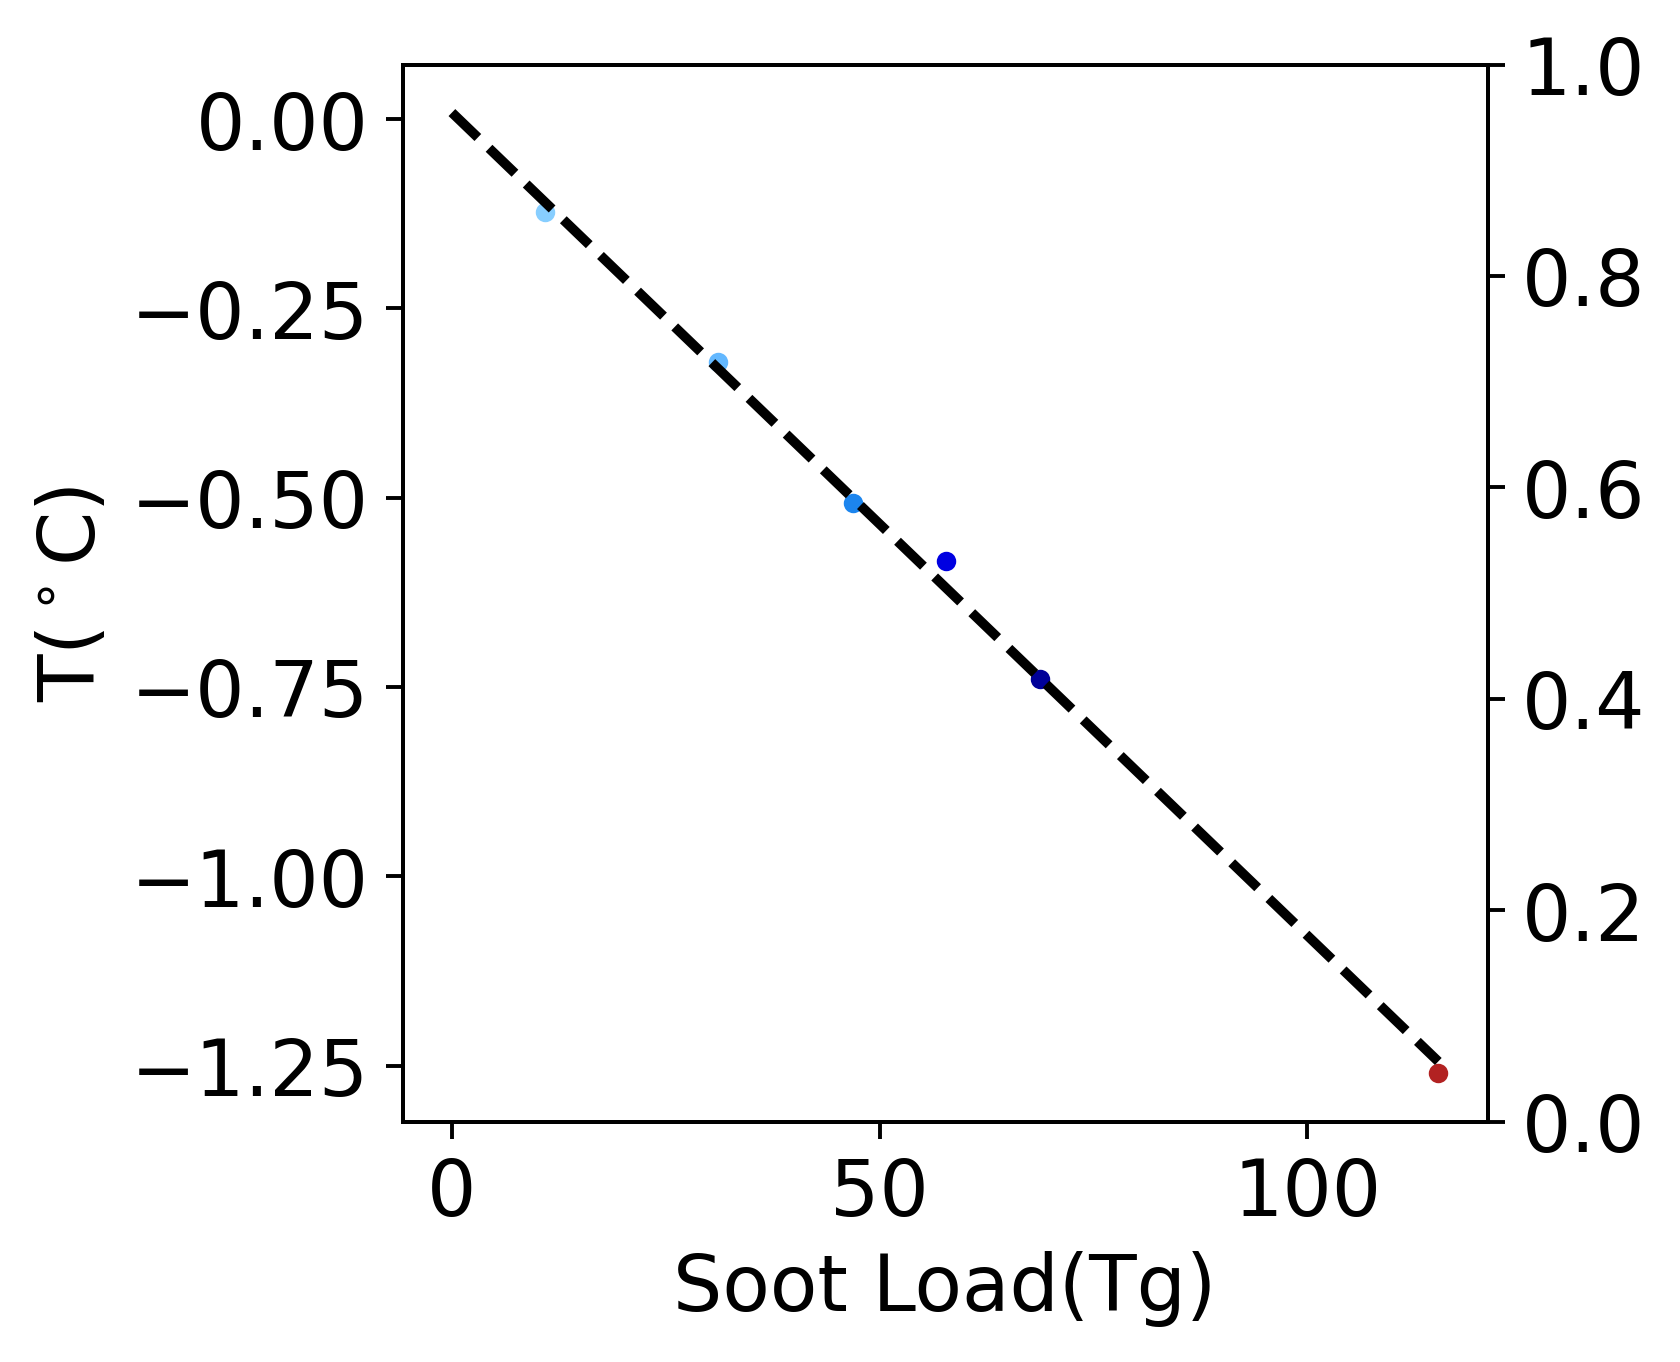

In [78]:
fig,ax1 = plt.subplots(figsize=(4,4), facecolor='w')


#fig, ax1 = plt.subplots()
levels = np.array([0, 5, 16, 27, 37, 47, 150 ])

#plt.plot(levels,sst_2034,'k.', markersize = 10)
#plt.legend( loc='lower right',fontsize = '10')
#plt.plot(dates_yr,1*sst_150_global_yr,color = '#b22222', linewidth = 1, label = '150 Tg')
#plt.plot(0,sst_control_2034,color = 'k',marker='.', label = 'Control')
ax1.plot(10.9,sst_5_2034-sst_control_2034   ,color = '#87ceff', marker = '.', label = '5 Tg')
ax1.plot(31.1,sst_16_2034-sst_control_2034 ,color = '#63b8ff', marker='.', label = '16 Tg')
ax1.plot(46.9,sst_27_2034-sst_control_2034 ,color = '#1c85ee', marker='.', label = '27 Tg')
ax1.plot(57.8,sst_37_2034-sst_control_2034 ,color = '#0000e1', marker='.', label = '37 Tg')
ax1.plot(68.7,sst_47_2034-sst_control_2034 ,color = '#000099', marker='.', label = '47 Tg')
ax1.plot(115.3,sst_150_2034-sst_control_2034,color = '#b22222', marker='.', label = '150 Tg')

ax1.plot(-1*swanom, slope3*(-1*swanom)+intercept3, 'k--')
#plt.plot(1*swanom, slope3*(-1*swanom)+intercept3,'k--')
ax1.set_xlabel('Soot Load(Tg)')
ax1.set_ylabel('T($^\circ$C)')

ax2 = ax1.twinx()
#ax2.plot(10.9,nit_5_2034-nit_control_2034   ,color = '#666666', marker = '.', label = '5 Tg')
#ax2.plot(31.1,nit_27_2034-nit_control_2034 ,color = '#63b8ff', marker='.', label = '27 Tg')
#ax2.plot(46.9,nit_37_2034-nit_control_2034 ,color = '#0000e1', marker='.', label = '37 Tg')
#ax2.plot(57.8,nit_16_2034-nit_control_2034 ,color = '#87ceff', marker='.', label = '16 Tg')
#ax2.plot(68.7,nit_47_2034-nit_control_2034 ,color = '#000099', marker='.', label = '47 Tg')
#ax2.plot(115.3,nit_150_2034-nit_control_2034,color = '#b22222', marker='.', label = '150 Tg')
#ax2.set_ylabel('Soot Load(Tg)')
plt.show() 

saveState = '/glade/u/home/vgarza/par/'
ptitle = '2034 annual mean at 50 meters'
#fig.savefig(saveState+ ptitle+ ' '  , bbox_inches='tight', quality = 95, dpi = 500)

In [79]:
slope2, intercept2, r_value2, p_value2, std_err2= stats.linregress(-1*swanom,nit_2034)

In [ ]:
import matplotlib.markers as mmark
import matplotlib.lines as mlines

blue_star = mlines.Line2D([], [], marker='.', linestyle='None',
                          markersize=10)

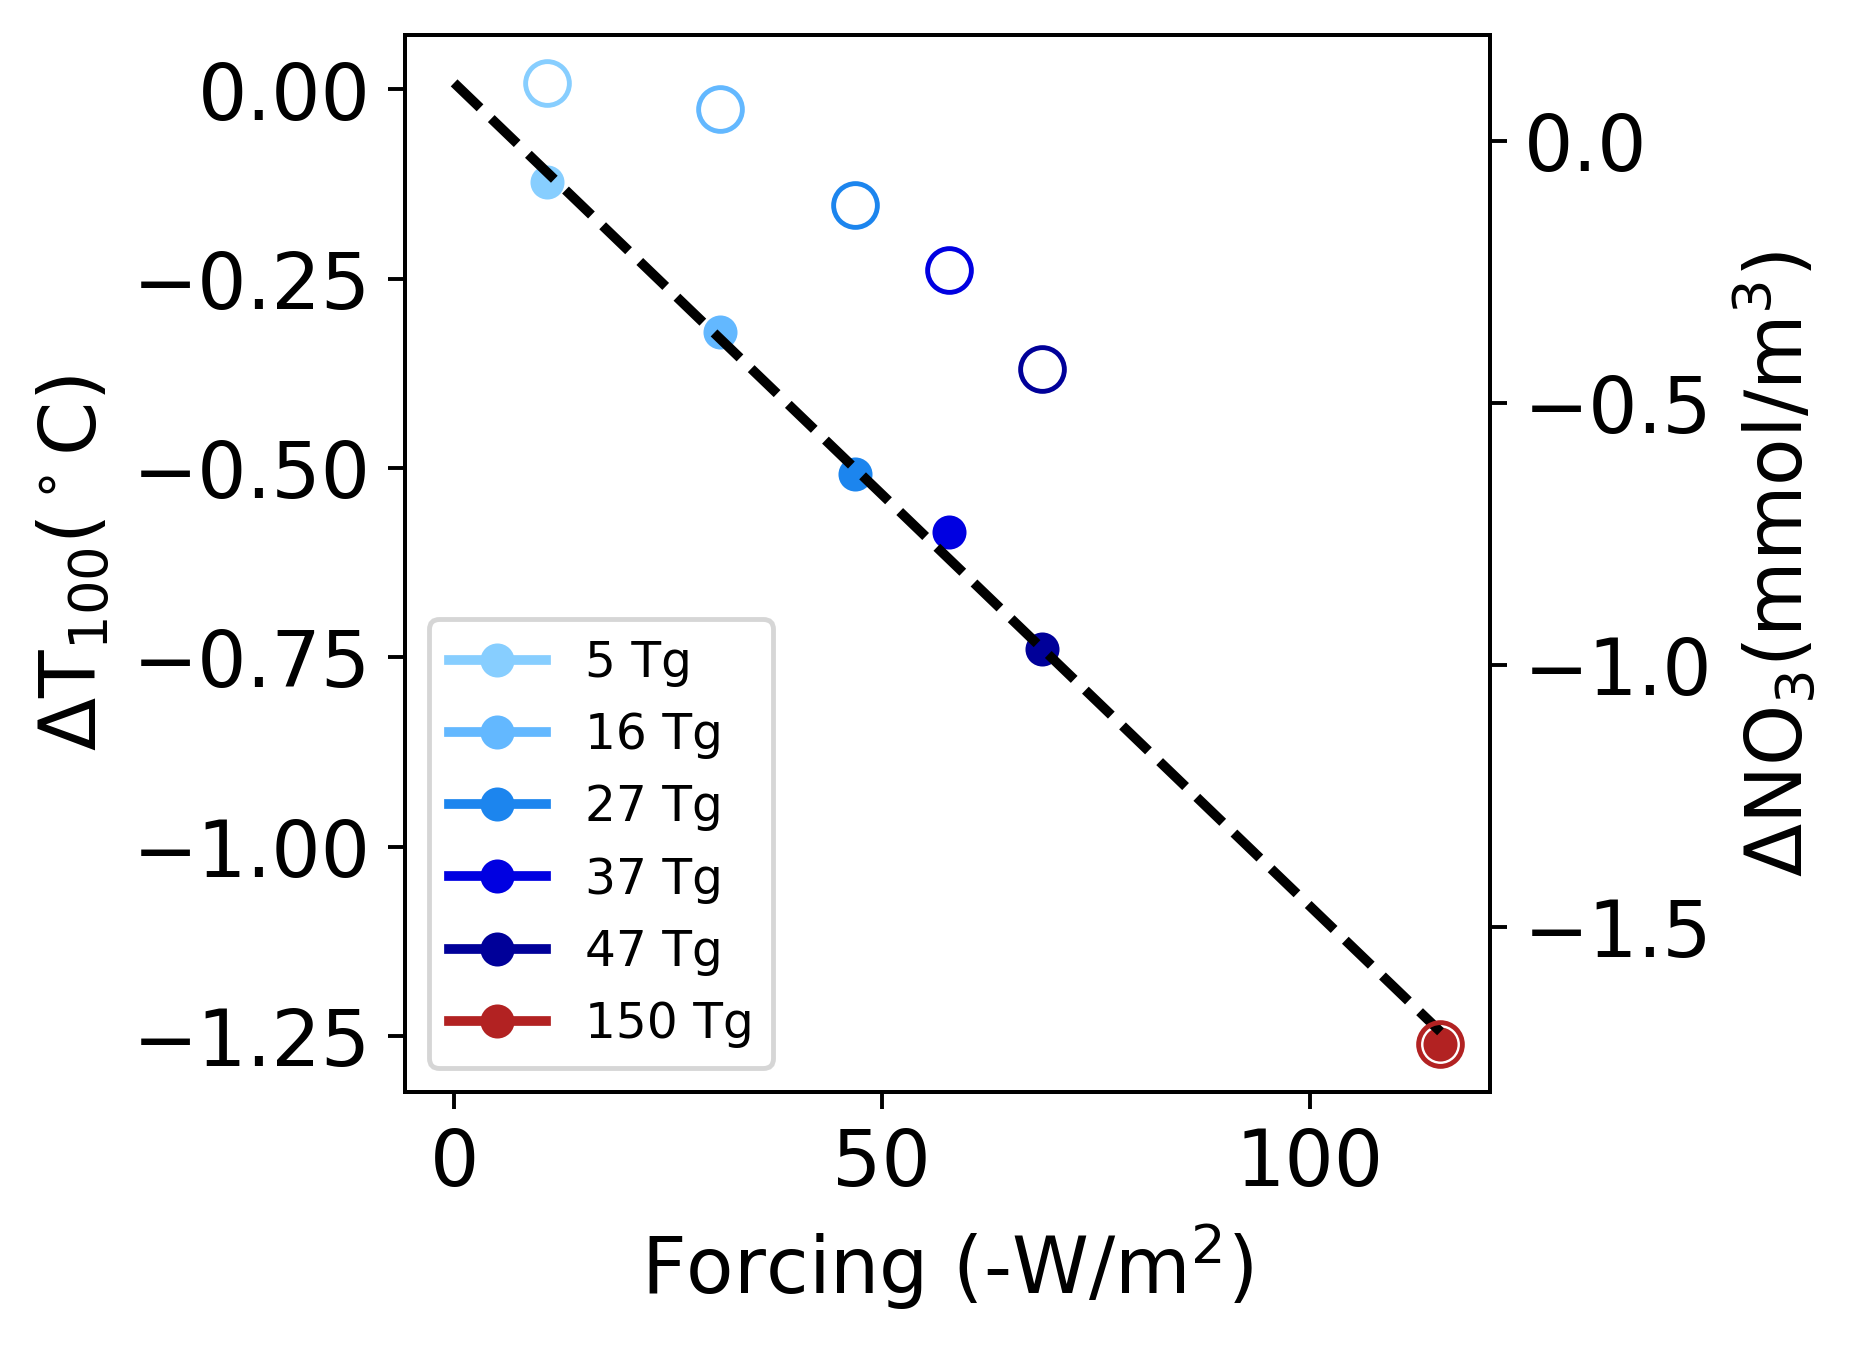

In [80]:
fig,ax1 = plt.subplots(figsize=(4,4), facecolor='w')


#fig, ax1 = plt.subplots()
levels = np.array([0, 5, 16, 27, 37, 47, 150 ])

#plt.plot(levels,sst_2034,'k.', markersize = 10)
#plt.legend( loc='lower right',fontsize = '10')
#plt.plot(dates_yr,1*sst_150_global_yr,color = '#b22222', linewidth = 1, label = '150 Tg')
#plt.plot(0,sst_control_2034,color = 'k',marker='.', label = 'Control')
ax1.plot(10.9,sst_5_2034-sst_control_2034   ,color = '#87ceff', marker='.', label = '5 Tg',markersize = '12')
ax1.plot(31.1,sst_16_2034-sst_control_2034 , color = '#63b8ff', marker='.', label = '16 Tg',markersize = '12')
ax1.plot(46.9,sst_27_2034-sst_control_2034 , color = '#1c85ee', marker='.', label = '27 Tg',markersize = '12')
ax1.plot(57.8,sst_37_2034-sst_control_2034 , color = '#0000e1', marker='.', label = '37 Tg',markersize = '12')
ax1.plot(68.7,sst_47_2034-sst_control_2034 , color = '#000099', marker='.', label = '47 Tg',markersize = '12')
ax1.plot(115.3,sst_150_2034-sst_control_2034,color = '#b22222', marker='.', label = '150 Tg',markersize = '12')

ax1.plot(-1*swanom, slope3*(-1*swanom)+intercept3, 'k--')

ax1.set_xlabel('Forcing (-W/m$^2$)')
ax1.set_ylabel('$\Delta$T$_{100}$($^\circ$C)')

ax2 = ax1.twinx()
ax2.plot(10.9,-1*(nit_5_2034-nit_control_2034)   ,color = '#87ceff', marker='o', label = '5 Tg',fillstyle='none',markersize = '9')#, label = '5 Tg')
ax2.plot(31.1,-1*(nit_16_2034-nit_control_2034) ,color = '#63b8ff', marker='o', label = '16 Tg',fillstyle='none',markersize = '9')
ax2.plot(46.9,-1*(nit_27_2034-nit_control_2034) ,color = '#1c85ee', marker='o', label = '27 Tg',fillstyle='none',markersize = '9')#,  label = '27 Tg')
ax2.plot(57.8,-1*(nit_37_2034-nit_control_2034) ,color = '#0000e1', marker='o', label = '37 Tg',fillstyle='none',markersize = '9')#, label = '37 Tg')
ax2.plot(68.7,-1*(nit_47_2034-nit_control_2034) , color = '#000099', marker='o', label = '47 Tg',fillstyle='none',markersize = '9')#, label = '47 Tg')
ax2.plot(115.3,-1*(nit_150_2034-nit_control_2034),color = '#b22222', marker='o', label = '150 Tg',fillstyle='none',markersize = '9')# label = '150 Tg')

#ax2.plot(-1*swanom, slope2*(-1*swanom)+intercept2, 'g--')

ax1.legend( loc='lower left',fontsize = '10', scatterpoints=1)
#ax1.legend(loc='best', shadow=True, fancybox=True, numpoints=1)


ax2.set_ylabel('$\Delta$NO$_3$(mmol/m$^3$)')
plt.show() 

saveState = '/glade/u/home/vgarza/par/'
ptitle = 'T_100 and NO3 with forcing, need to fix legend'

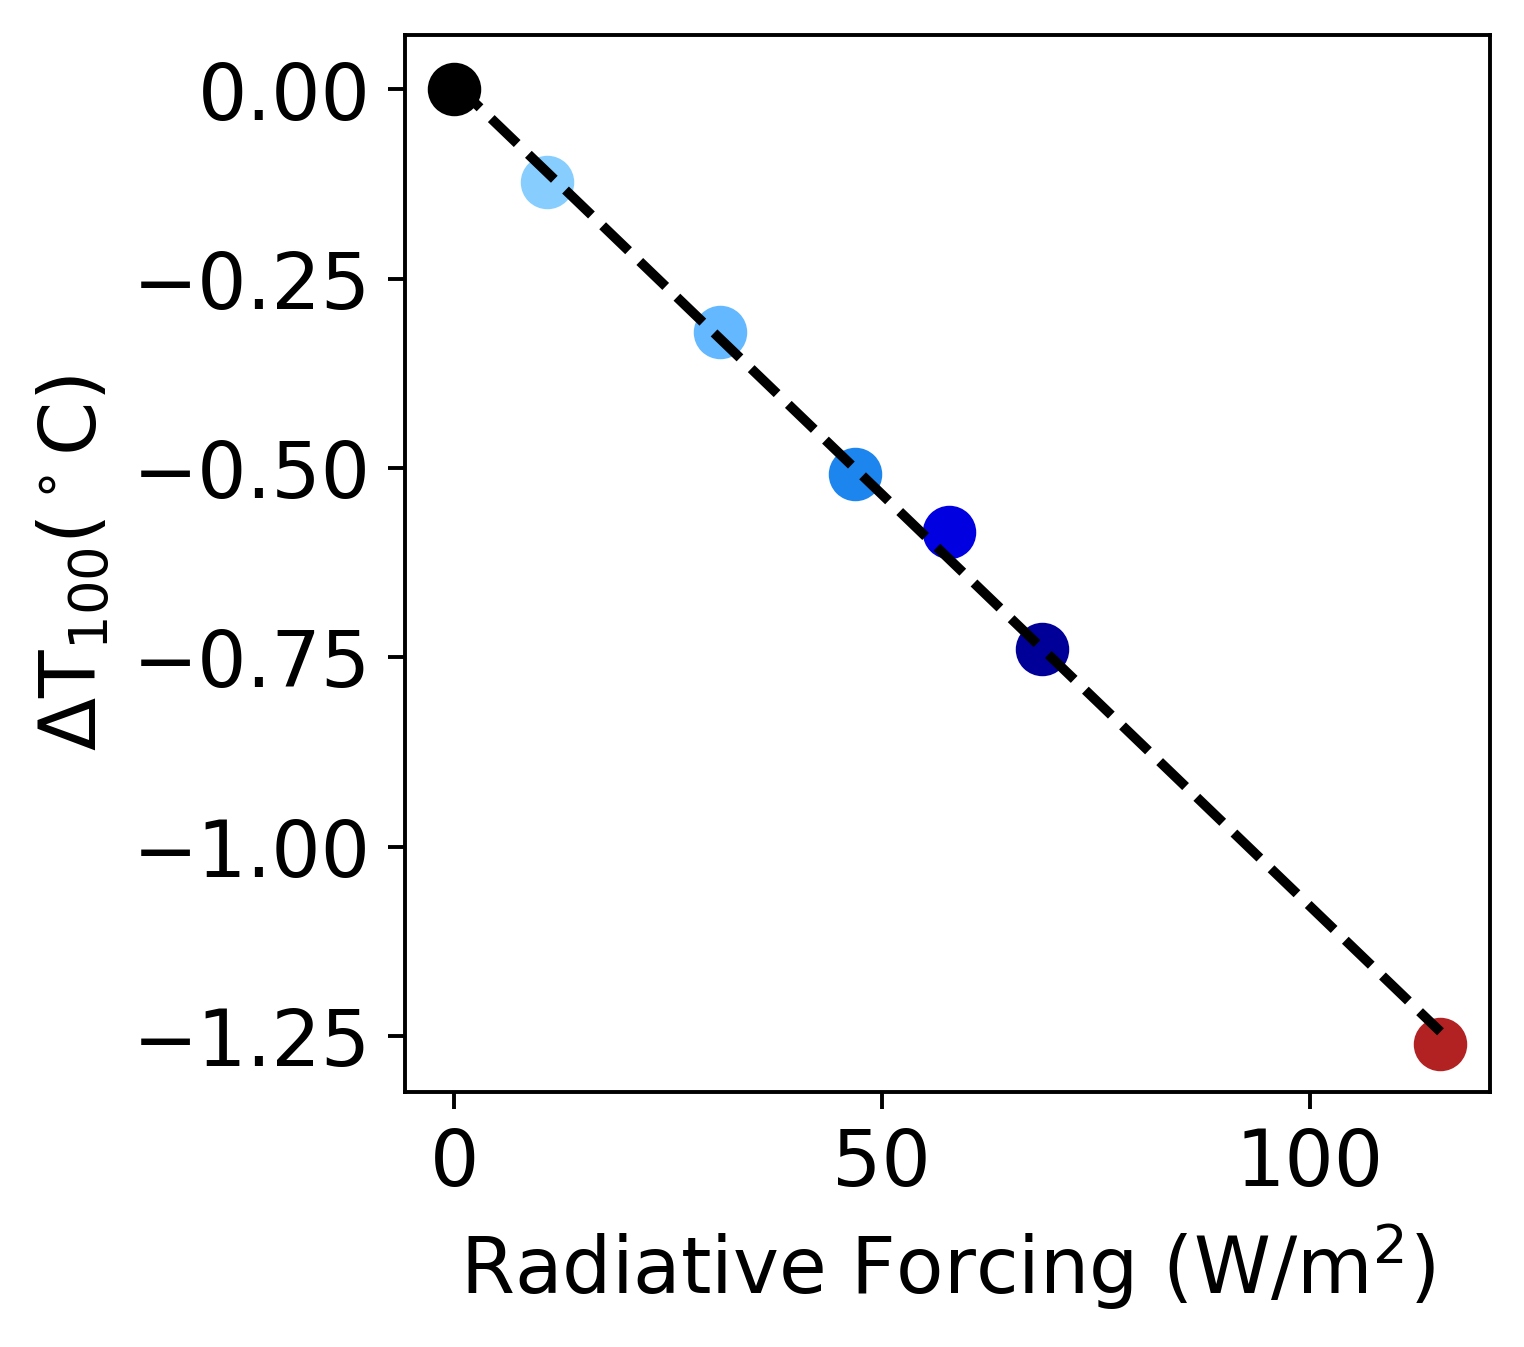

In [81]:
fig,ax1 = plt.subplots(figsize=(4,4), facecolor='w')


#fig, ax1 = plt.subplots()
levels = np.array([0, 5, 16, 27, 37, 47, 150 ])

#plt.plot(levels,sst_2034,'k.', markersize = 10)
#plt.legend( loc='lower right',fontsize = '10')
#plt.plot(dates_yr,1*sst_150_global_yr,color = '#b22222', linewidth = 1, label = '150 Tg')
plt.plot(0,sst_control_2034-sst_control_2034,color = 'k', marker='.', label = '5 Tg',markersize = '20')
ax1.plot(10.9,sst_5_2034-sst_control_2034   ,color = '#87ceff', marker='.', label = '5 Tg',markersize = '20')
ax1.plot(31.1,sst_16_2034-sst_control_2034, color = '#63b8ff', marker='.', label = '16 Tg',markersize = '20')
ax1.plot(46.9,sst_27_2034-sst_control_2034, color = '#1c85ee', marker='.', label = '27 Tg',markersize = '20')
ax1.plot(57.8,sst_37_2034-sst_control_2034, color = '#0000e1', marker='.', label = '37 Tg',markersize = '20')
ax1.plot(68.7,sst_47_2034-sst_control_2034, color = '#000099', marker='.', label = '47 Tg',markersize = '20')
ax1.plot(115.3,sst_150_2034-sst_control_2034,color = '#b22222', marker='.', label = '150 Tg',markersize = '20')

ax1.plot(-1*swanom, slope3*(-1*swanom)+intercept3, 'k--')

ax1.set_xlabel('Radiative Forcing (W/m$^2$)')#+'Forcing (-W/m$^2$)')
ax1.set_ylabel('$\Delta$T$_{100}$($^\circ$C)')

#ax1.legend( loc='lower left',fontsize = '10', scatterpoints=1)
plt.show() 

saveState = '/glade/u/home/vgarza/par/'
ptitle = 'Delta T with forcing'

#fig.savefig('/glade/work/vgarza/nw_figures/Delta SST dot.jpg' , bbox_inches='tight')